In [1]:
# Déclaration du DataSet
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [2]:
# Chargement du package pandas
import pandas
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [3]:
# Déclaration du TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)

# Création du Dataframe et affichage des premiers éléments
df = pandas.DataFrame(te_ary, columns=te.columns_)
df.head()

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [4]:
# apriori en fonction du DataFrame
frequent_itemsets = apriori(df, min_support = 0.6, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Yogurt)"


In [5]:
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.7)
rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
8,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
9,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
10,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.00,1.25,0.12,inf
11,(Eggs),"(Kidney Beans, Onion)",0.8,0.6,0.6,0.75,1.25,0.12,1.6


In [6]:
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.5)
rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
12,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
13,(Kidney Beans),"(Onion, Eggs)",1.0,0.6,0.6,0.60,1.00,0.00,1.0
14,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.00,1.25,0.12,inf
15,(Eggs),"(Kidney Beans, Onion)",0.8,0.6,0.6,0.75,1.25,0.12,1.6


In [7]:
# Application des règles d'association
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.9)
rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Onion),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
4,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
5,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
6,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
7,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.0,1.25,0.12,inf


In [8]:
# Sélection des règles
rules[rules['antecedents'] == {'Eggs', 'Kidney Beans'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [9]:
df  = pandas.read_csv('data/BreadBasket_DMS.csv')
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [11]:
# Données en minuscule et tri croissant
df['Item'] = df['Item'].str.lower()
df['Item'].value_counts().sort_values(ascending=False).head(20)

coffee           5471
bread            3325
tea              1435
cake             1025
pastry            856
none              786
sandwich          771
medialuna         616
hot chocolate     590
cookies           540
brownie           379
farm house        374
muffin            370
juice             369
alfajores         369
soup              342
scone             327
toast             318
scandinavian      277
truffles          193
Name: Item, dtype: int64

In [12]:
# Calcul nu nombre de valeur définies à "none"
x = df['Item'] == "none"
print(x.value_counts())

False    20507
True       786
Name: Item, dtype: int64


In [13]:
# On retire les item définis à "none"
df = df.drop(df[df.Item == 'none'].index)

# Affichage des éléments sans le "none"
df['Item'].value_counts().head(10)

coffee           5471
bread            3325
tea              1435
cake             1025
pastry            856
sandwich          771
medialuna         616
hot chocolate     590
cookies           540
brownie           379
Name: Item, dtype: int64

In [14]:
# Nombre de valeurs uniques
df['Item'].nunique()

94

<AxesSubplot:>

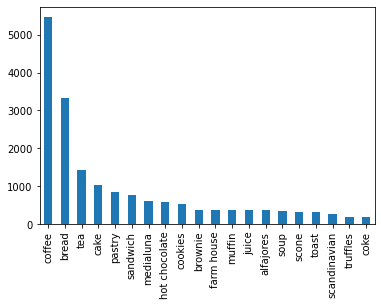

In [15]:
# Package d'affichage graphique
import matplotlib.pyplot as plt

# Affichage en histogramme des 20 premiers éléments
df['Item'].value_counts().sort_values(ascending=False).head(20).plot.bar()

In [16]:
# Définition du datetime qui sera découpé
df['datetime'] = pandas.to_datetime(df['Date']+" "+df['Time'])
df['Week'] = df['datetime'].dt.isocalendar().week
df['Month'] = df['datetime'].dt.month
df['Weekday'] = df['datetime'].dt.weekday
df['Hours'] = df['datetime'].dt.hour
df['Dayofyear'] = df['datetime'].dt.dayofyear
df.head()

,Date,Time,Transaction,Item,datetime,Week,Month,Weekday,Hours,Dayofyear
0,2016-10-30,09:58:11,1,bread,2016-10-30 09:58:11,43,10,6,9,304
1,2016-10-30,10:05:34,2,scandinavian,2016-10-30 10:05:34,43,10,6,10,304
2,2016-10-30,10:05:34,2,scandinavian,2016-10-30 10:05:34,43,10,6,10,304
3,2016-10-30,10:07:57,3,hot chocolate,2016-10-30 10:07:57,43,10,6,10,304
4,2016-10-30,10:07:57,3,jam,2016-10-30 10:07:57,43,10,6,10,304


In [17]:
# Datetime est au format datetime64
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         20507 non-null  object        
 1   Time         20507 non-null  object        
 2   Transaction  20507 non-null  int64         
 3   Item         20507 non-null  object        
 4   datetime     20507 non-null  datetime64[ns]
 5   Week         20507 non-null  UInt32        
 6   Month        20507 non-null  int64         
 7   Weekday      20507 non-null  int64         
 8   Hours        20507 non-null  int64         
 9   Dayofyear    20507 non-null  int64         
dtypes: UInt32(1), datetime64[ns](1), int64(5), object(3)
memory usage: 1.7+ MB


In [18]:
# Date maximale
df['datetime'].max()

Timestamp('2017-04-09 15:04:24')

In [19]:
# Date minimale
df['datetime'].min()

Timestamp('2016-10-30 09:58:11')

In [20]:
# Calcul de la date maximale - la date minimale => Timedelta
df['datetime'].max()-df['datetime'].min()

Timedelta('161 days 05:06:13')

In [21]:
# Nouveau DataFrame en fonction de colonnes sélectionnées
df1 = df[['Date', 'Transaction', 'Month', 'Week', 'Weekday', 'Hours', 'Dayofyear', 'Item']]
df1.head()

,Date,Transaction,Month,Week,Weekday,Hours,Dayofyear,Item
0,2016-10-30,1,10,43,6,9,304,bread
1,2016-10-30,2,10,43,6,10,304,scandinavian
2,2016-10-30,2,10,43,6,10,304,scandinavian
3,2016-10-30,3,10,43,6,10,304,hot chocolate
4,2016-10-30,3,10,43,6,10,304,jam


In [22]:
# Plus petite semaine
df['Week'].min()

1

<AxesSubplot:xlabel='Week', ylabel='count'>

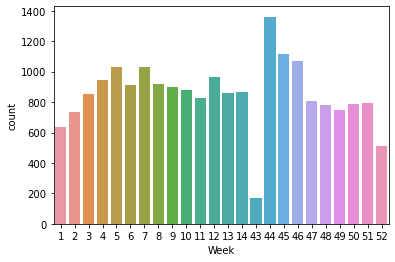

In [23]:
import seaborn as sns

# Affichage d'un histogramme en fonction de Week
sns.countplot(x = 'Week', data = df1)

<AxesSubplot:xlabel='Dayofyear', ylabel='count'>

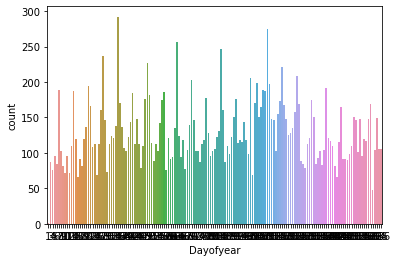

In [24]:
# Affichage d'un histogramme en fonction de Dayofyear
sns.countplot(x = 'Dayofyear', data = df1)

<AxesSubplot:xlabel='Weekday', ylabel='count'>

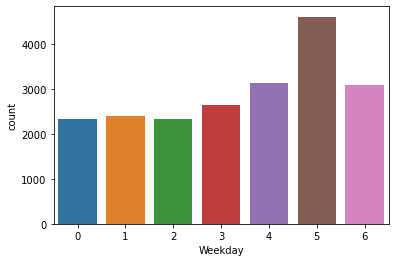

In [25]:
# Affichage d'un histogramme en fonction de Weekday
sns.countplot(x = 'Weekday', data = df1)

<AxesSubplot:xlabel='Hours', ylabel='count'>

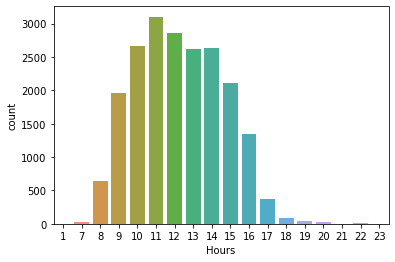

In [26]:
# Affichage d'un histogramme en fonction de Hours
sns.countplot(x = 'Hours', data = df1)

<AxesSubplot:xlabel='Month', ylabel='count'>

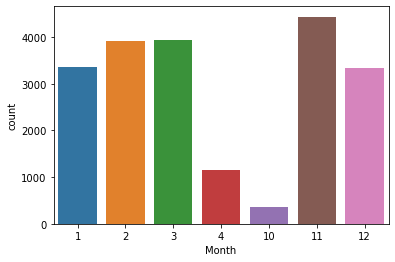

In [27]:
# Affichage d'un histogramme en fonction de Month
sns.countplot(x = 'Month', data = df1)

<AxesSubplot:xlabel='Date', ylabel='count'>

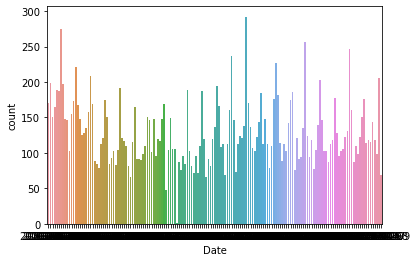

In [28]:
# Affichage d'un histogramme en fonction de Date
sns.countplot(x = 'Date', data = df1)

<AxesSubplot:xlabel='Item', ylabel='count'>

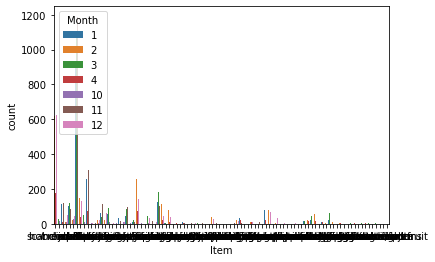

In [29]:
# Affichage d'un histogramme en fonction de Item et de Month
sns.countplot(x = 'Item', hue = 'Month', data = df1)

In [30]:
# Regroupement par Transaction et Item
df1 = df.groupby(['Transaction', 'Item'])['Item'].count()
df1.head(10)

Transaction  Item         
1            bread            1
2            scandinavian     2
3            cookies          1
             hot chocolate    1
             jam              1
4            muffin           1
5            bread            1
             coffee           1
             pastry           1
6            medialuna        1
Name: Item, dtype: int64

In [31]:
# Arrangement des colonnes
df2 = df1.unstack()
df2.head(10)

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Reset des index
df3 = df2.reset_index()
df3.head(10)

Item,Transaction,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Remplacement des données NaN par 0
df4 = df3.fillna(0).set_index('Transaction')
df4.head(10)

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Application de toutes les modifications sur une ligne (groupby, unstack, reset_index, fillna et set_index)
df_pivottable = df.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
df_pivottable.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Retourne 1 pour chaque élément acheté par transaction sinon retourne 0
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

df_pivottable = df4.applymap(encode_units)
df_pivottable.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# apriori sur le df_pivotable qui a été alimenté précédemment avec des 0 et 1
frequent_itemsets = apriori(df_pivottable, min_support = 0.01, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(coffee, toast)"
57,0.014369,"(tea, sandwich)"
58,0.010037,"(coffee, cake, bread)"
59,0.011199,"(coffee, pastry, bread)"


In [37]:
# Application des règles d'association sur le nouveau tableau
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(coffee),(alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
2,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
3,(bread),(pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
4,(coffee),(brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080
5,(brownie),(coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
6,(coffee),(cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
8,(cake),(hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
9,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125


In [38]:
rules.tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32,(tea),(sandwich),0.142631,0.071844,0.014369,0.100741,1.402222,0.004122,1.032134
33,(sandwich),(tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712
34,"(coffee, bread)",(cake),0.090016,0.103856,0.010037,0.111502,1.073621,0.000688,1.008606
35,(cake),"(coffee, bread)",0.103856,0.090016,0.010037,0.096643,1.073621,0.000688,1.007336
36,"(coffee, bread)",(pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749
37,(pastry),"(coffee, bread)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033
38,"(tea, coffee)",(cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
39,"(coffee, cake)",(tea),0.054728,0.142631,0.010037,0.183398,1.285822,0.002231,1.049923
40,(tea),"(coffee, cake)",0.142631,0.054728,0.010037,0.070370,1.285822,0.002231,1.016827
41,(cake),"(tea, coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779


In [39]:
# Affichage des éléments en fonction de lift et de confidence
rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
13,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
15,(hot chocolate),(coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
19,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
26,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
28,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235


In [40]:
# Affichage des éléments en fonction de antecedent support et de confidence
rules[(rules['antecedent support'] >= 0.08) & (rules['confidence'] >= 0.1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
6,(coffee),(cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
8,(cake),(hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
10,(tea),(cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
11,(cake),(tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
23,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
32,(tea),(sandwich),0.142631,0.071844,0.014369,0.100741,1.402222,0.004122,1.032134
34,"(coffee, bread)",(cake),0.090016,0.103856,0.010037,0.111502,1.073621,0.000688,1.008606
36,"(coffee, bread)",(pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749
